# GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer a woman job candidate, given what I would offer a man for the same job?)


In [1]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl

import json
import os
s = json.load(open(os.getenv('PUI2015')+'/PUI2015_MMajumdar/pui.json'))
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\ManushiM\Anaconda\lib\site-packages\matplotlib\__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

unfortunately a lot of the links that i originally used a few weeks ago are broken now. I posted the data I had used on the class webpage here (together with data for the buildings & energy homework): http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data

In [2]:
#Accessing the data
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"

allMales={}
allFemales={}

allMales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)
allMales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allMales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allMales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allMales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

allFemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allFemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allFemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allFemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allFemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

#### Exploratory phase

In [ ]:
#The scatter matrix takes too long to plot. So I did not rerun it.
from pandas.tools.plotting import scatter_matrix
scatter_matrix(allMales['all'],s=300,figsize=(16,16),diagonal='kde')

In [3]:
#Cleaning the data

for k in allMales:
    nonreal  = allMales[k].applymap(np.isreal)
    for c in allMales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allMales[k][c][~nonreal[c]] = np.float('NaN')
            allMales[k][c] = allMales[k][c].astype(float)

for k in allFemales:
    nonreal  = allFemales[k].applymap(np.isreal)
    for c in allFemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allFemales[k][c][~nonreal[c]] = np.float('NaN')
            allFemales[k][c] = allFemales[k][c].astype(float) 

C:\Users\ManushiM\Anaconda\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ManushiM\Anaconda\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
MaleMedianIncome = []
MaleMedianIncome = [allMales['all']['Median income'][1], allMales['white']['Median income'][1], 
     allMales['black']['Median income'][1], allMales['asian']['Median income'][1], allMales['hispanic']['Median income'][1]]
FemaleMedianIncome = []
FemaleMedianIncome = [allFemales['all']['Median income'][1], allFemales['white']['Median income'][1], 
    allFemales['black']['Median income'][1], allFemales['asian']['Median income'][1], allFemales['hispanic']['Median income'][1]]

print MaleMedianIncome
print FemaleMedianIncome

[35228.0, 40122.0, 24855.0, 40153.0, 25411.0]
[22063.0, 23780.0, 20044.0, 24840.0, 17762.0]


In [5]:
#Linear regression
import statsmodels.api as smf
males = smf.add_constant(MaleMedianIncome)
model1=smf.OLS(FemaleMedianIncome, males)
results1=model1.fit()
print results1.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     22.70
Date:                Mon, 19 Oct 2015   Prob (F-statistic):             0.0176
Time:                        20:01:34   Log-Likelihood:                -40.948
No. Observations:                   5   AIC:                             85.90
Df Residuals:                       3   BIC:                             85.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       9989.8444   2508.397      3.983      0.0

C:\Users\ManushiM\Anaconda\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


In [6]:
#Analytical regression
import scipy.stats as stats
correlationCoefficient = stats.spearmanr(MaleMedianIncome, FemaleMedianIncome)
std(MaleMedianIncome)/std(FemaleMedianIncome)
beta1=correlationCoefficient[0]*std(FemaleMedianIncome)/std(MaleMedianIncome)
beta0=mean(FemaleMedianIncome)-beta1*mean(MaleMedianIncome)

In [7]:
#Combining data
all_Males=np.ma.array(np.concatenate([allMales['all']['Median income'][:].values, allMales['white']['Median income'][:].values, 
                                      allMales['black']['Median income'][:].values,
                                      allMales['hispanic']['Median income'][:].values,
                                      allMales['asian']['Median income'][:].values]).flatten())

all_Females=np.ma.array(np.concatenate([allFemales['all']['Median income'][:].values, 
                                        allFemales['white']['Median income'][:].values, 
                                        allFemales['black']['Median income'][:].values,
                                        allFemales['hispanic']['Median income'][:].values, 
                                        allFemales['asian']['Median income'][:].values]).flatten())

#Applying mask
allMask = [np.isnan(all_Males) + np.isnan(all_Females)]
all_Females.mask = allMask
all_Males.mask = allMask


In [8]:
#New Regression
model2=smf.OLS(all_Females.mask, all_Males.mask)
results2=model2.fit()
print '\n' 
print results2.summary()



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Mon, 19 Oct 2015   Prob (F-statistic):               0.00
Time:                        20:01:48   Log-Likelihood:                    inf
No. Observations:                 245   AIC:                              -inf
Df Residuals:                     244   BIC:                              -inf
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.0000          0        inf      0

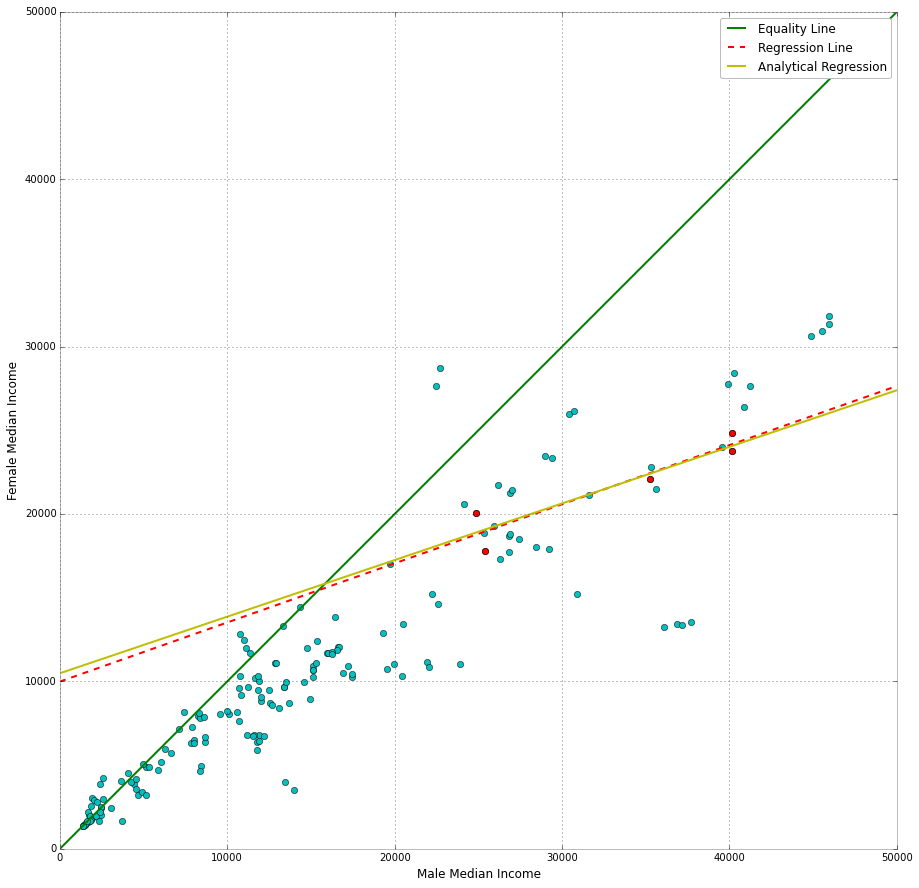

In [9]:
import matplotlib.pyplot as plt
fig = figure(figsize = (15,15))

plt.plot(all_Males, all_Females, 'co')

#Including Equality Line
x =np.linspace(0,50000,1000)
y=x
plt.plot(x,y, 'g', label = 'Equality Line')

#Plotting the fit line
x1=np.linspace(0,50000,1000)
y1=results1.params[1]*x1 + results1.params[0]
plt.plot(x1,y1, 'r--', label = 'Regression Line')


#Plotting the analytical regression line
x2=np.linspace(0,50000,1000)
y2=beta1*x2 +beta0
plt.plot(x2,y2, 'y', label = 'Analytical Regression')

#Plotting Total Male Median Income vs Total Female Median Income
#with each race as one data point
plt.plot(MaleMedianIncome, FemaleMedianIncome, 'ro')

plt.legend()
plt.xlabel ('Male Median Income')
plt.ylabel ('Female Median Income')

## Now pick a stipend, maybe your ideal stipend? And predict what a woman in a position where a man recieves your ideal stipend would make



Irrespective of the stipend selected, the graph shows us that a woman would earn less than what a man would earn.